In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns

from warnings import filterwarnings

filterwarnings(action='ignore')

In [3]:
# Independent Axis

x = [x for x in range(-10, 10)]

# Dependent Axes
y1 = [a + round(np.random.normal(0, 0.75), 2) for a in x]
y2 = [a**2 + round(np.random.normal(0, 3), 2) for a in x]

df = pd.DataFrame({'x': x, 'y': y1})

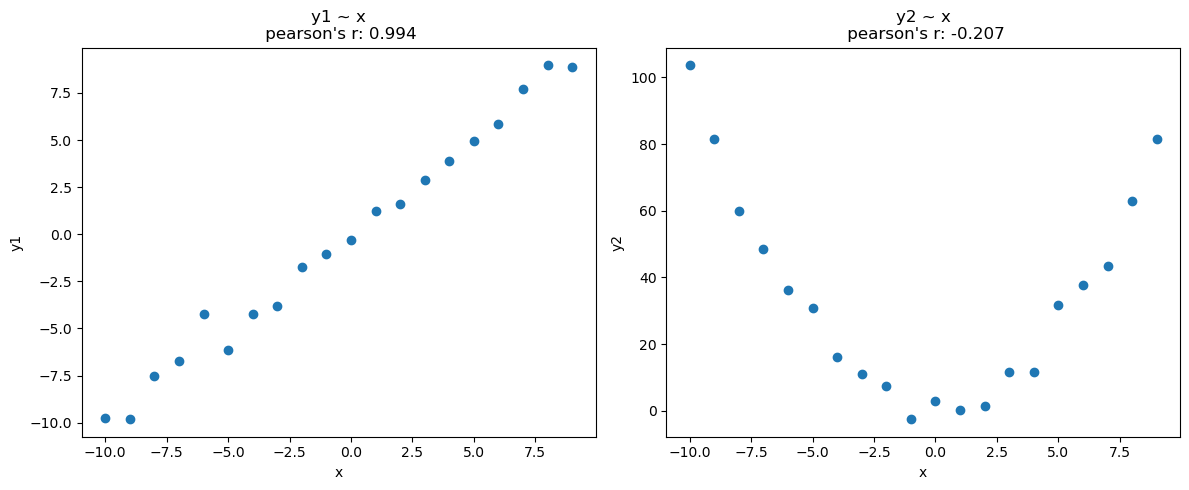

In [5]:
plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x, y1)
plt.xlabel("x")
plt.ylabel("y1")
plt.title(f"y1 ~ x\n pearson's r: {round(np.corrcoef(x, y1)[0,1],3)}")


plt.subplot(1, 2, 2)
plt.scatter(x, y2)
plt.xlabel("x")
plt.ylabel("y2")
plt.title(f"y2 ~ x\n pearson's r: {round(np.corrcoef(x, y2)[0,1],3)}")


plt.tight_layout()
plt.show()

In [7]:
# import the dataset

df = pd.read_csv('car_price.csv')

df.head()

,Unnamed: 0,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Setting the car_ID to index and dropping

df.set_index('car_ID', inplace=True)

df.head()

,Unnamed: 0,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,
1,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Splitting the data into features and target

# The dependent variable
y = df['price']

# The independent variables
X = df.drop('price', axis=1)

print (f'The shape of the dependent variable: {y.shape}')
print (f'The shape of the independent variables: {X.shape}')

The shape of the dependent variable: (205,)
The shape of the independent variables: (205, 15)


In [13]:
from sklearn.linear_model import LinearRegression

In [15]:
# Instantiate the model

linear_regression_model = LinearRegression()

# Fit the model

linear_regression_model.fit(X, y)

LinearRegression()

In [17]:
#The intercept
intercept = linear_regression_model.intercept_

#The coefficient, notice it returns an array with one spot for each feature
coefficient = linear_regression_model.coef_

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')


Intercept: -54682.189073020956
Coefficients: [-1.79979935e+01  2.65801042e+02  1.38318258e+02 -5.55565478e+01
  4.09596013e+02  2.56966219e+02  1.58805627e+00  1.05817662e+02
  2.34816262e+02 -3.34105762e+03  3.07197878e+02  4.30686772e+01
  1.98959125e+00 -2.43603478e+02  1.86516332e+02]


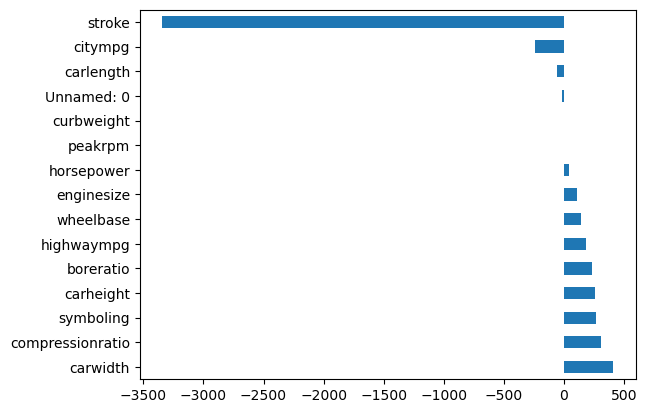

In [19]:
pd.Series(coefficient, index=X.columns).sort_values(ascending=False).plot(kind='barh')
plt.show()

In [21]:
y_predict = linear_regression_model.predict(X)

error = np.max(np.abs(y_predict - y)) # Maximum absolute error in our predictions

print(f'Maximum absolute error is {error}')

Maximum absolute error is 12872.471354019654


In [23]:
from sklearn.metrics import r2_score

# Evaluate the model
print(f'The R2 score: {r2_score(y, y_predict)}')

The R2 score: 0.8655989433050961


In [25]:
# 3. Scoring the model

linear_regression_model.score(X, y)

0.8655989433050961

In [27]:
from sklearn.linear_model import LogisticRegression

In [40]:
# Data source: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming,
# "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008

bt = pd.read_csv('blood_transfusions.csv')
bt.head()

,Recency,Frequency,Monetary,Time,Donated
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [42]:
# Splitting the data into X and y

X = bt[['Frequency']]
y = bt['Donated']

In [44]:
#1. Instantiate the model

bt_model = LogisticRegression(solver='liblinear')

# 2. Fit the model
bt_model.fit(X, y)

LogisticRegression(solver='liblinear')

In [46]:
# Prediction of the input data

predictions = bt_model.predict(X)
predictions[:10]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [48]:
beta_0 = bt_model.intercept_[0]
print(beta_0)

betas = bt_model.coef_
print(betas)

-1.6115249184592328
[[0.07709727]]


In [50]:
bt_model.predict_proba(X)[:, 1]

array([0.90407436, 0.35222791, 0.40661692, 0.48261211, 0.55942023,
       0.21363773, 0.25505255, 0.3348438 , 0.28543706, 0.87379622,
       0.54034017, 0.20097156, 0.30141848, 0.35222791, 0.24068251,
       0.22687552, 0.3700125 , 0.38815697, 0.24068251, 0.20097156,
       0.20097156, 0.31789662, 0.24068251, 0.24068251, 0.28543706,
       0.3700125 , 0.24068251, 0.3348438 , 0.22687552, 0.26997552,
       0.3700125 , 0.30141848, 0.30141848, 0.28543706, 0.40661692,
       0.26997552, 0.3348438 , 0.24068251, 0.3700125 , 0.25505255,
       0.35222791, 0.22687552, 0.22687552, 0.22687552, 0.48261211,
       0.28543706, 0.28543706, 0.18887597, 0.18887597, 0.18887597,
       0.31789662, 0.31789662, 0.24068251, 0.3348438 , 0.22687552,
       0.46339638, 0.26997552, 0.25505255, 0.40661692, 0.24068251,
       0.25505255, 0.26997552, 0.30141848, 0.22687552, 0.20097156,
       0.40661692, 0.21363773, 0.18887597, 0.25505255, 0.28543706,
       0.21363773, 0.21363773, 0.42534447, 0.18887597, 0.18887

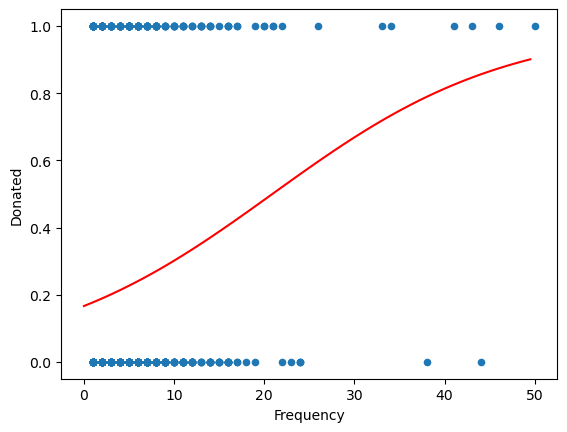

In [52]:
bt_data = bt[['Frequency', 'Donated']]
bt_data.plot.scatter("Frequency", "Donated")

# plot the predicted probability:
plt.plot(np.arange(0, 50, .5), bt_model.predict_proba(
    np.arange(0, 50, .5).reshape(-1, 1))[:, 1], color='red')

plt.show()

In [54]:
bt_model.score(X, y)

0.766042780748663

In [56]:
# import lmodel

from sklearn.tree import DecisionTreeClassifier

In [58]:
# Building model

bt_model = DecisionTreeClassifier()

bt_model.fit(X, y)

DecisionTreeClassifier()

In [60]:
# Getting model accuracy

bt_model.score(X, y)

0.7780748663101604

In [62]:
from sklearn.datasets import load_iris

In [64]:
# Creating the target and features

iris = load_iris() #This is a dictionary with data and target as keys

X = iris.data
y = iris.target

In [66]:
# Features in the iris dataset

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [68]:
# importing the train test split function

from sklearn.model_selection import train_test_split

In [70]:
# splitting the dataset with 20% as test and 80% as train

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

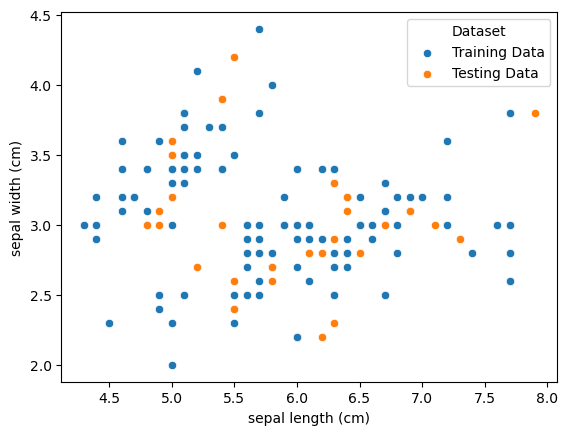

In [72]:
# Let's visualize the train and test

plt.figure()

# Plot training data
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], label='Training Data')

# Plot testing data
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], label='Testing Data')


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.legend(title='Dataset')
plt.show()

In [74]:
# Importing RandomForest from sklearn ensemble models

from sklearn.ensemble import RandomForestClassifier

In [76]:
# Building model

RF_iris = RandomForestClassifier(n_estimators=3) # The n_estimators parameter specifies the number of trees in the forst

RF_iris.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [78]:
# Printing the train and test accuracy

print(f'The train accuracy is {RF_iris.score(X_train, y_train)}')
print(f'The test accuracy is {RF_iris.score(X_test, y_test)}')

The train accuracy is 0.9583333333333334
The test accuracy is 1.0


In [80]:
# Importing the dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [82]:
# Splitting the dataset into train and test

X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [84]:
# Fitting the model

# 1. Instantiate the model

linear_housing = LinearRegression()

# 2. Fit the model
linear_housing.fit(X_train, y_train)

LinearRegression()

In [86]:
# Importing r2_score, and mean_absolute_error functions

from sklearn.metrics import r2_score, mean_absolute_error

In [88]:
# Getting predictions

y_prediction_train = linear_housing.predict(X_train)
y_prediction_test = linear_housing.predict(X_test)

In [90]:
eval_df = pd.DataFrame({"R2": [r2_score(y_train, y_prediction_train), r2_score(y_test, y_prediction_test)],
                        "MAE": [mean_absolute_error(y_train, y_prediction_train), mean_absolute_error(y_test, y_prediction_test)]},
                       index=['training', 'test'])

eval_df

,R2,MAE
training,0.606657,0.530801
test,0.602812,0.535128


In [94]:
# Importing the dataset

student = pd.read_csv('Student_performance_data.csv', index_col=0)
student.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,,,,,,,,,,,,,,
1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [96]:
# Splitting our data into X and y

X = student.iloc[:, :-1]  # every column except the last one
y = student['GradeClass']

In [98]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=student['GradeClass'])

In [100]:
# 1. Instantiate the model

student_dt = DecisionTreeClassifier(max_depth=5)

# 2. Fit the model

student_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [102]:
from sklearn.metrics import classification_report

In [104]:
student_predictions = student_dt.predict(X_test)

report = classification_report(y_test, student_predictions)

print(report)

              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76        21
         1.0       0.91      0.80      0.85        54
         2.0       0.92      0.88      0.90        78
         3.0       0.91      0.88      0.90        83
         4.0       0.91      0.98      0.94       243

    accuracy                           0.91       479
   macro avg       0.91      0.84      0.87       479
weighted avg       0.91      0.91      0.91       479

